In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('./data/result_final.csv', parse_dates=['baseYmd'])
df

,areaNm,touNum,baseYmd,avgTemp,dayRf,daySf,festival,holiday,PM10,PM25,AccumulateCovid19,increase,localIncrease,CovidForeigner
0,서울특별시,1171117.50,2022-01-01,-4.3,0.0,0.0,no,yes,no,no,226698.0,1464.0,1429.0,35.0
1,부산광역시,445102.00,2022-01-01,1.9,0.0,0.0,no,yes,no,no,25287.0,212.0,210.0,2.0
2,대구광역시,264113.50,2022-01-01,-2.3,0.0,0.0,no,yes,no,no,23249.0,125.0,125.0,0.0
3,인천광역시,496692.00,2022-01-01,-3.4,0.0,0.0,no,yes,no,no,36962.0,241.0,239.0,2.0
4,광주광역시,161028.00,2022-01-01,-0.1,0.0,0.0,no,yes,no,no,8118.0,92.0,91.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,전라북도,221235.00,2022-09-03,25.3,0.0,0.0,yes,yes,no,no,788103.0,3442.0,3431.0,11.0
6201,전라남도,304470.25,2022-09-03,24.1,0.5,0.0,yes,yes,no,no,776823.0,3048.0,3041.0,7.0
6202,경상북도,425582.50,2022-09-03,21.0,0.1,0.0,no,yes,no,no,1042687.0,4782.0,4753.0,29.0
6203,경상남도,363550.25,2022-09-03,21.0,6.6,0.0,no,yes,no,no,1406209.0,5373.0,5362.0,11.0


In [169]:
seoul = df.loc[df['areaNm'] == '서울특별시'].sort_values('baseYmd')
seoul

,areaNm,touNum,baseYmd,avgTemp,dayRf,daySf,festival,holiday,PM10,PM25,AccumulateCovid19,increase,localIncrease,CovidForeigner
0,서울특별시,1171117.5,2022-01-01,-4.3,0.0,0.0,no,yes,no,no,226698.0,1464.0,1429.0,35.0
17,서울특별시,1112258.0,2022-01-02,-1.3,0.3,0.5,no,yes,no,no,227879.0,1183.0,1127.0,56.0
34,서울특별시,1067566.5,2022-01-03,-1.9,0.0,0.0,no,no,no,no,228867.0,993.0,964.0,29.0
51,서울특별시,1134094.5,2022-01-04,-2.5,0.0,0.0,no,no,no,no,229801.0,938.0,903.0,35.0
68,서울특별시,1175737.5,2022-01-05,-2.8,0.0,0.0,no,no,no,no,231213.0,1412.0,1346.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,서울특별시,1586875.5,2022-12-27,-2.6,0.0,0.3,no,no,no,no,5610852.0,18725.0,18723.0,2.0
6018,서울특별시,1611519.0,2022-12-28,-3.3,0.1,0.4,no,no,no,no,5626635.0,15783.0,15783.0,0.0
6035,서울특별시,1628557.0,2022-12-29,-2.9,0.0,0.0,no,no,no,no,5640031.0,13396.0,13396.0,0.0
6052,서울특별시,1754651.5,2022-12-30,-1.8,0.0,0.0,no,no,no,no,5651699.0,11668.0,11665.0,3.0


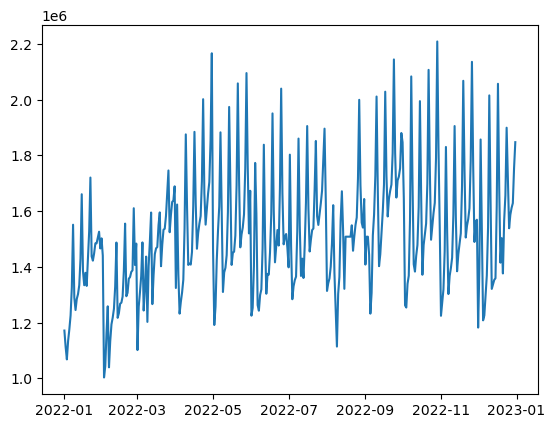

In [170]:
train = seoul[:]
test = seoul[:]
plt.plot(train['baseYmd'], train['touNum'])
plt.show()

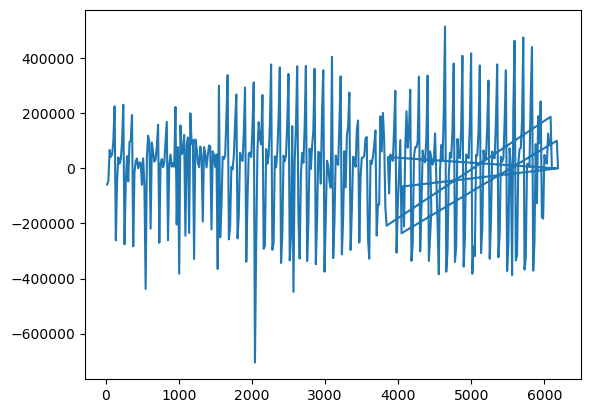

In [171]:
diff_1 = train['touNum'].diff().dropna()
plt.plot(diff_1)
plt.show()

In [172]:
diff_1

17      -58859.5
34      -44691.5
51       66528.0
68       41643.0
85       49497.0
          ...   
6001     48436.5
6018     24643.5
6035     17038.0
6052    126094.5
6069     92830.5
Name: touNum, Length: 364, dtype: float64

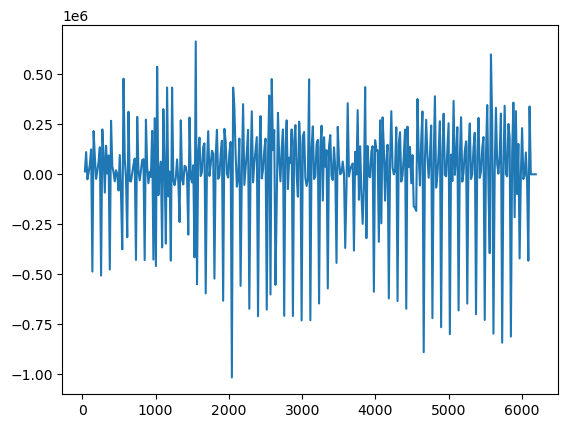

In [6]:
diff_2 = diff_1.diff().dropna()
plt.plot(diff_2)
plt.show()

시계열분석 및 모델링

- ARIMA (자기회귀모델, AutoRegressive Model)

In [ ]:
# 데이터 분할
X = df_jeju['increase'].values.reshape(-1, 1) # 독립 변수
y = df_jeju['touNum'].values.reshape(-1, 1) # 종속 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}')

# 미래 예측
future_confirmed = [[100], [200], [300]]
future_tourists = model.predict(future_confirmed)
    

MAE: 24467.20, RMSE: 31390.45


In [173]:
# 자기 상관 함수

def arima_analysis2(data_path, column_name, city, order=(1,2,1), test_size=30, freq='D'):
    # 불러올 데이터
    df = pd.read_csv(data_path, parse_dates=['baseYmd'])
    data_df = df.loc[df['areaNm'] == city]
    data_df.drop(columns=['areaNm'], inplace=True)
    # 날짜 인덱스 설정
    data_df = data_df.set_index('baseYmd').sort_index()
    data_df.index.freq = freq  # 시간 주기 정보 추가
    train_data = data_df.iloc[:-test_size]
    test_data = data_df.iloc[-test_size:]
    # sm.graphics.tsa.plot_acf(train_data[column_name], lags=50, use_vlines=True)
    sm.graphics.tsa.plot_acf(pd.Series(train_data[column_name]).diff(2).dropna(), lags=50, use_vlines=True)
    plt.show()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6884\3918317223.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop(columns=['areaNm'], inplace=True)


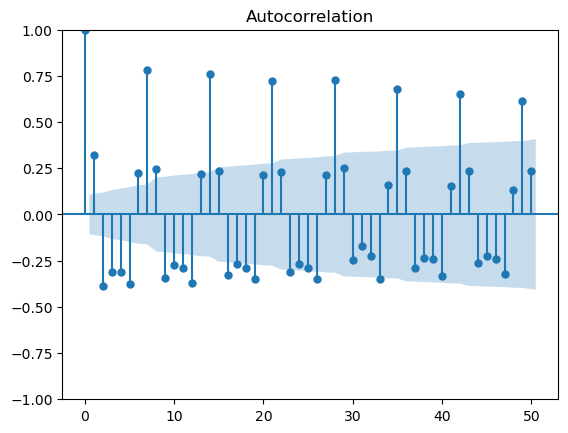

In [174]:
arima_analysis2('./data/df_final.csv', 'touNum', '서울특별시')

In [202]:
def arima_analysis(data_path, column_name, city, order=(2,1,3), test_size=60, freq='D'):
    # 불러올 데이터
    df = pd.read_csv(data_path, parse_dates=['baseYmd'])
    data_df = df.loc[df['areaNm'] == city]
    data_df.drop(columns=['areaNm'], inplace=True)
    # 날짜 인덱스 설정
    data_df = data_df.set_index('baseYmd').sort_index()
    data_df.index.freq = freq  # 시간 주기 정보 추가
    train_data = data_df.iloc[:-test_size]
    test_data = data_df.iloc[-test_size:]
    # 학습용 모델 Train ARIMA model
    model = ARIMA(train_data[column_name], order=order)
    model_fit = model.fit()
    # 예측값 생성
    predictions = model_fit.forecast(steps=len(test_data))
    # 시각화
    plt.plot(data_df[column_name], label='Actual')
    plt.plot(test_data.index, predictions, label='Predicted')
    plt.title(f'{column_name} Forecasting with ARIMA Model')
    plt.xlabel('baseYmd')
    plt.ylabel(column_name)
    plt.legend()
    # x축의 눈금(label)을 baseYmd 열의 값으로 설정
    plt.xticks(data_df.index[::36], data_df.index[::36].strftime('%Y-%m-%d'), rotation=45)
    plt.show()


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_6884\2404172828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop(columns=['areaNm'], inplace=True)


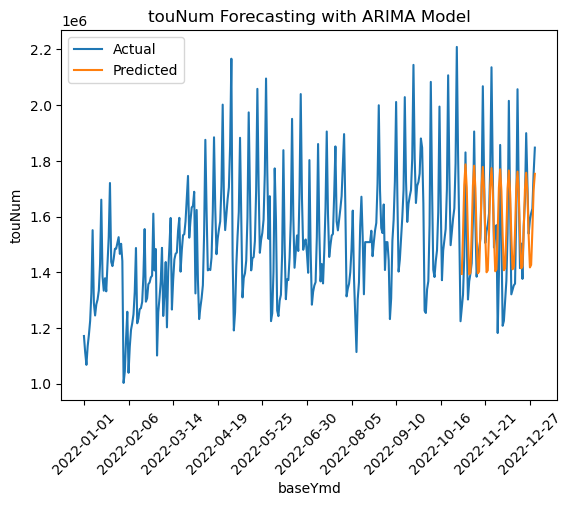

In [203]:
arima_analysis('./data/df_final.csv', 'touNum', '서울특별시')